# Explore here

In [13]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)


df.head()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Duplicados 

In [ ]:
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")


duplicated_rows = df[duplicados]
print(duplicated_rows.head())

Número de filas duplicadas: 0
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


valores nulos 

In [ ]:
valores_nulos = df.isnull().sum()


print(valores_nulos[valores_nulos > 0])

Series([], dtype: int64)


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Variables numericas 

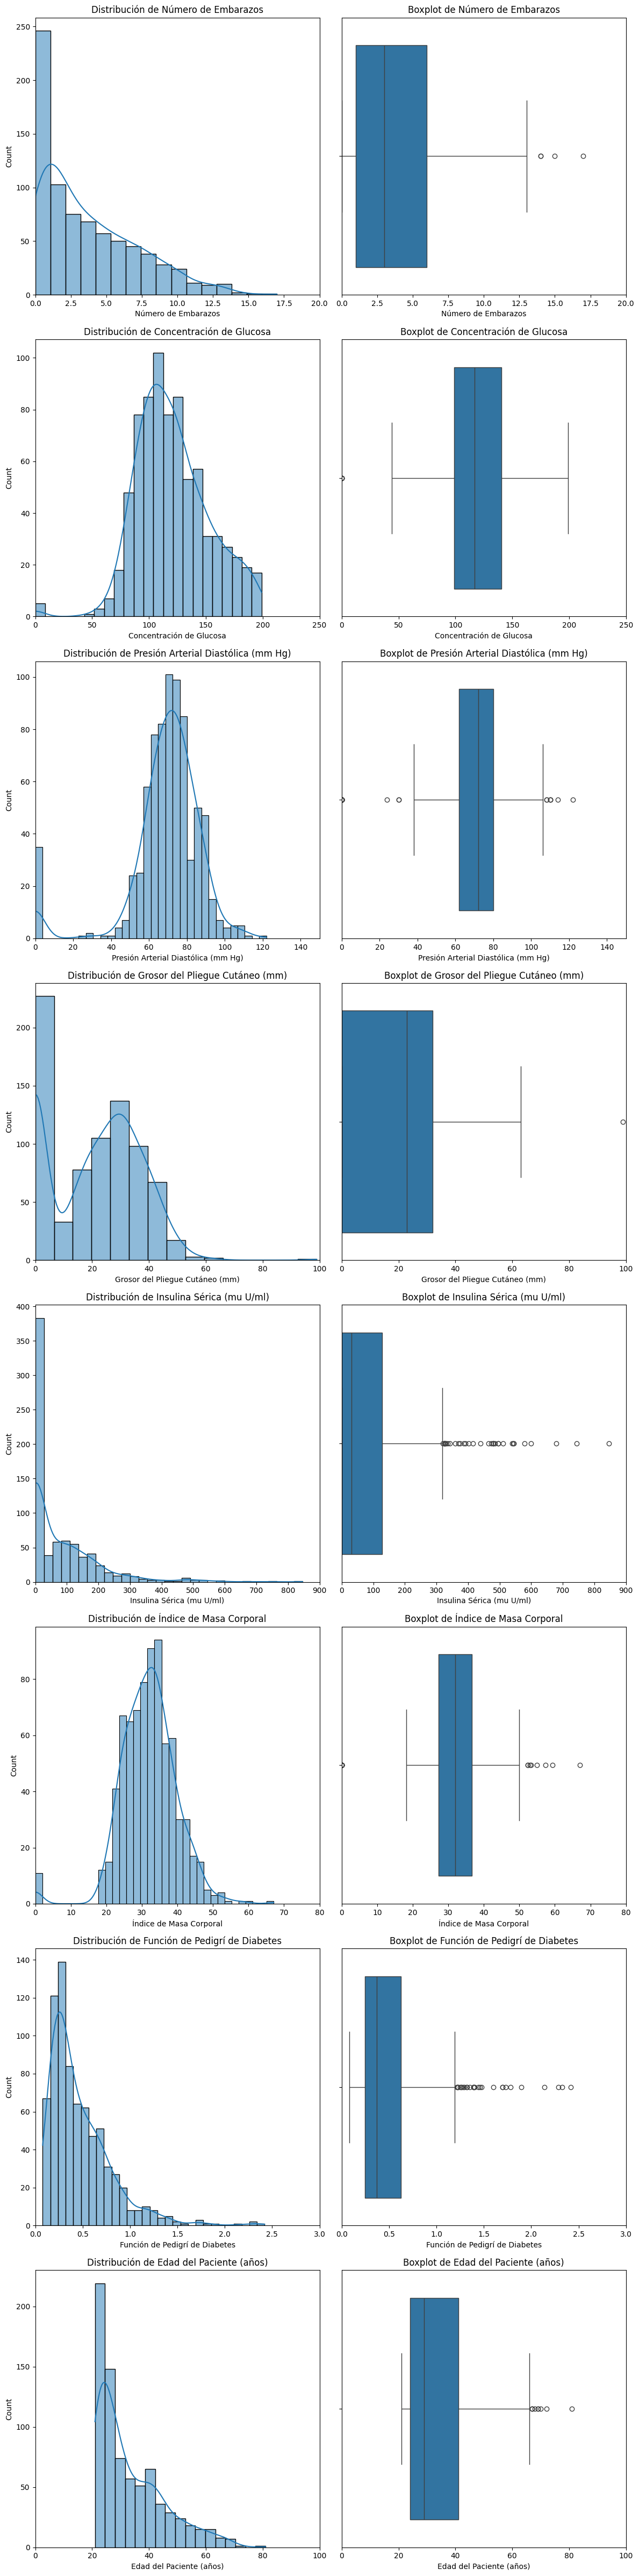

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

column_names_es = {
    'Pregnancies': 'Número de Embarazos',
    'Glucose': 'Concentración de Glucosa',
    'BloodPressure': 'Presión Arterial Diastólica (mm Hg)',
    'SkinThickness': 'Grosor del Pliegue Cutáneo (mm)',
    'Insulin': 'Insulina Sérica (mu U/ml)',
    'BMI': 'Índice de Masa Corporal',
    'DiabetesPedigreeFunction': 'Función de Pedigrí de Diabetes',
    'Age': 'Edad del Paciente (años)'
}

xlimits = {
    'Pregnancies': (0, 20),
    'Glucose': (0, 250),
    'BloodPressure': (0, 150),
    'SkinThickness': (0, 100),
    'Insulin': (0, 900),
    'BMI': (0, 80),
    'DiabetesPedigreeFunction': (0, 3),
    'Age': (0, 100)
}

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 6 * len(numerical_columns)), gridspec_kw={"height_ratios": [6] * len(numerical_columns)})

for i, column in enumerate(numerical_columns):
    sns.histplot(ax=axes[i, 0], data=df, x=column, kde=True)
    axes[i, 0].set_title(f"Distribución de {column_names_es[column]}")
    axes[i, 0].set_xlabel(column_names_es[column])
    if column in xlimits:
        axes[i, 0].set_xlim(xlimits[column])

    sns.boxplot(ax=axes[i, 1], data=df, x=column)
    axes[i, 1].set_title(f"Boxplot de {column_names_es[column]}")
    axes[i, 1].set_xlabel(column_names_es[column])
    if column in xlimits:
        axes[i, 1].set_xlim(xlimits[column])

plt.tight_layout()
plt.show()

Matriz de correlación

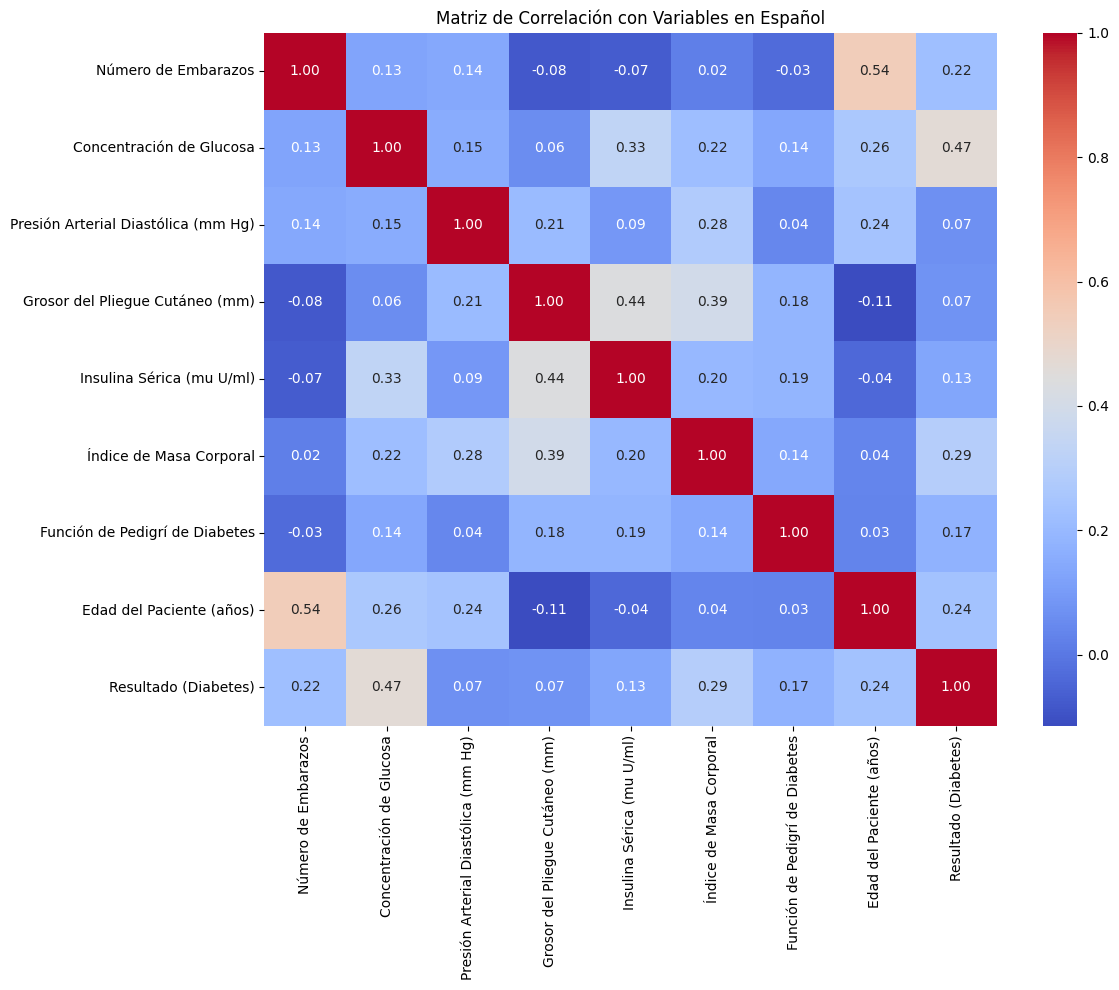

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



columnas_numericas_en = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

columnas_numericas_es = {
    'Pregnancies': 'Número de Embarazos',
    'Glucose': 'Concentración de Glucosa',
    'BloodPressure': 'Presión Arterial Diastólica (mm Hg)',
    'SkinThickness': 'Grosor del Pliegue Cutáneo (mm)',
    'Insulin': 'Insulina Sérica (mu U/ml)',
    'BMI': 'Índice de Masa Corporal',
    'DiabetesPedigreeFunction': 'Función de Pedigrí de Diabetes',
    'Age': 'Edad del Paciente (años)',
    'Outcome': 'Resultado (Diabetes)'
}

correlation_matrix = df[columnas_numericas_en].corr()


fig, ax = plt.subplots(figsize=(12, 10))  


sns.heatmap(correlation_matrix.rename(index=columnas_numericas_es, columns=columnas_numericas_es),
            annot=True, cmap="coolwarm", fmt=".2f")


plt.title("Matriz de Correlación con Variables en Español")

plt.tight_layout()


plt.show()

valores atipicos 

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


outliers Embarazo 

In [ ]:
emba = df['Pregnancies'].describe()
emba

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [ ]:
Q1 = df["Pregnancies"].quantile(0.25)
Q3 = df["Pregnancies"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_sin_outliers_embarazos = df[
    (df["Pregnancies"] >= limite_inferior) & (df["Pregnancies"] <= limite_superior)
]


print(f"Forma del DataFrame original: {df.shape}")
print(f"Forma del DataFrame sin outliers en 'Pregnancies': {df_sin_outliers_embarazos.shape}")


df = df_sin_outliers_embarazos.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'Pregnancies': {df.shape}")

Forma del DataFrame original: (768, 9)
Forma del DataFrame sin outliers en 'Pregnancies': (764, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'Pregnancies': (764, 9)


outliers Glucosa

In [ ]:
gluc = df['Glucose'].describe()
gluc

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

In [ ]:

Q1_glucose = df["Glucose"].quantile(0.25)
Q3_glucose = df["Glucose"].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose


limite_inferior_glucose = Q1_glucose - 1.5 * IQR_glucose
limite_superior_glucose = Q3_glucose + 1.5 * IQR_glucose


outliers_glucose = df[
    (df["Glucose"] < limite_inferior_glucose) | (df["Glucose"] > limite_superior_glucose)
]
print(f"Número de outliers en 'Glucose' según el método IQR: {len(outliers_glucose)}")


df_sin_outliers_glucose_iqr = df[
    (df["Glucose"] >= limite_inferior_glucose) & (df["Glucose"] <= limite_superior_glucose)
]


print(f"Forma del DataFrame original (antes de eliminar outliers de Glucose con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'Glucose' (método IQR): {df_sin_outliers_glucose_iqr.shape}"
)


df = df_sin_outliers_glucose_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'Glucose' (método IQR): {df.shape}")

Número de outliers en 'Glucose' según el método IQR: 5
Forma del DataFrame original (antes de eliminar outliers de Glucose con IQR): (764, 9)
Forma del DataFrame sin outliers en 'Glucose' (método IQR): (759, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'Glucose' (método IQR): (759, 9)


outliers presion arterial 


In [ ]:
pres = df['BloodPressure'].describe()
pres

count    759.000000
mean      69.108037
std       19.445653
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [ ]:

Q1_bp = df["BloodPressure"].quantile(0.25)
Q3_bp = df["BloodPressure"].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp


limite_inferior_bp = Q1_bp - 1.5 * IQR_bp
limite_superior_bp = Q3_bp + 1.5 * IQR_bp


outliers_bp = df[
    (df["BloodPressure"] < limite_inferior_bp) | (df["BloodPressure"] > limite_superior_bp)
]
print(f"Número de outliers en 'BloodPressure' según el método IQR: {len(outliers_bp)}")


df_sin_outliers_bp_iqr = df[
    (df["BloodPressure"] >= limite_inferior_bp) & (df["BloodPressure"] <= limite_superior_bp)
]

print(f"Forma del DataFrame original (antes de eliminar outliers de BloodPressure con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'BloodPressure' (método IQR): {df_sin_outliers_bp_iqr.shape}"
)

df = df_sin_outliers_bp_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'BloodPressure' (método IQR): {df.shape}")

Número de outliers en 'BloodPressure' según el método IQR: 45
Forma del DataFrame original (antes de eliminar outliers de BloodPressure con IQR): (759, 9)
Forma del DataFrame sin outliers en 'BloodPressure' (método IQR): (714, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'BloodPressure' (método IQR): (714, 9)


outliers insulina

In [ ]:
insulin_stats_original = df['Insulin'].describe()
insulin_stats_original

count    714.000000
mean      84.422969
std      117.459744
min        0.000000
25%        0.000000
50%       48.000000
75%      131.500000
max      846.000000
Name: Insulin, dtype: float64

In [ ]:
Q1_insulin = df["Insulin"].quantile(0.25)
Q3_insulin = df["Insulin"].quantile(0.75)
IQR_insulin = Q3_insulin - Q1_insulin


limite_inferior_insulin = Q1_insulin - 1.5 * IQR_insulin
limite_superior_insulin = Q3_insulin + 1.5 * IQR_insulin


outliers_insulin = df[
    (df["Insulin"] < limite_inferior_insulin) | (df["Insulin"] > limite_superior_insulin)
]
print(f"\nNúmero de outliers en 'Insulin' según el método IQR: {len(outliers_insulin)}")


df_sin_outliers_insulin_iqr = df[
    (df["Insulin"] >= limite_inferior_insulin) & (df["Insulin"] <= limite_superior_insulin)
]


print(f"Forma del DataFrame original (antes de eliminar outliers de Insulin con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'Insulin' (método IQR): {df_sin_outliers_insulin_iqr.shape}"
)

df = df_sin_outliers_insulin_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'Insulin' (método IQR): {df.shape}")


insulin_stats_despues = df['Insulin'].describe()
print("\nEstadísticas descriptivas de 'Insulin' después de eliminar outliers:")
print(insulin_stats_despues)


Número de outliers en 'Insulin' según el método IQR: 28
Forma del DataFrame original (antes de eliminar outliers de Insulin con IQR): (714, 9)
Forma del DataFrame sin outliers en 'Insulin' (método IQR): (686, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'Insulin' (método IQR): (686, 9)

Estadísticas descriptivas de 'Insulin' después de eliminar outliers:
count    686.000000
mean      68.062682
std       83.237785
min        0.000000
25%        0.000000
50%       37.500000
75%      120.000000
max      328.000000
Name: Insulin, dtype: float64


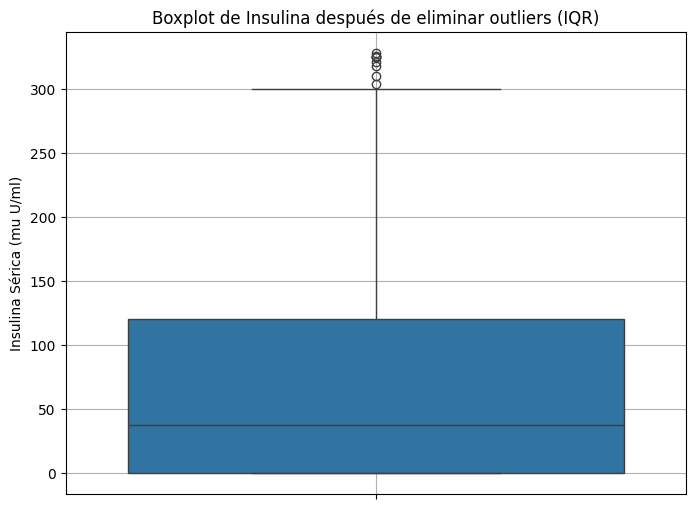

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Insulin'])
plt.title('Boxplot de Insulina después de eliminar outliers (IQR)')
plt.ylabel('Insulina Sérica (mu U/ml)')
plt.grid(True)
plt.show()

outliers SkinThickness	

In [ ]:
plie_cut = df['SkinThickness'].describe()
plie_cut

count    686.000000
mean      20.826531
std       15.736997
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:

Q1_skin = df["SkinThickness"].quantile(0.25)
Q3_skin = df["SkinThickness"].quantile(0.75)
IQR_skin = Q3_skin - Q1_skin

limite_inferior_skin = Q1_skin - 1.5 * IQR_skin
limite_superior_skin = Q3_skin + 1.5 * IQR_skin


outliers_skin = df[
    (df["SkinThickness"] < limite_inferior_skin) | (df["SkinThickness"] > limite_superior_skin)
]
print(f"Número de outliers en 'SkinThickness' según el método IQR: {len(outliers_skin)}")


df_sin_outliers_skin_iqr = df[
    (df["SkinThickness"] >= limite_inferior_skin) & (df["SkinThickness"] <= limite_superior_skin)
]


print(f"Forma del DataFrame original (antes de eliminar outliers de SkinThickness con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'SkinThickness' (método IQR): {df_sin_outliers_skin_iqr.shape}"
)


df = df_sin_outliers_skin_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'SkinThickness' (método IQR): {df.shape}")

skin_thickness_stats = df['SkinThickness'].describe()
print("\nEstadísticas descriptivas de 'SkinThickness' después de eliminar outliers:")
print(skin_thickness_stats)

Número de outliers en 'SkinThickness' según el método IQR: 1
Forma del DataFrame original (antes de eliminar outliers de SkinThickness con IQR): (686, 9)
Forma del DataFrame sin outliers en 'SkinThickness' (método IQR): (685, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'SkinThickness' (método IQR): (685, 9)

Estadísticas descriptivas de 'SkinThickness' después de eliminar outliers:
count    685.000000
mean      20.712409
std       15.461816
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       63.000000
Name: SkinThickness, dtype: float64


outliers BMI

In [ ]:
bmi_stat= df['BMI'].describe()
bmi_stat

count    685.000000
mean      31.992263
std        7.090708
min        0.000000
25%       27.200000
50%       32.000000
75%       36.200000
max       59.400000
Name: BMI, dtype: float64

In [ ]:
Q1_bmi = df["BMI"].quantile(0.25)
Q3_bmi = df["BMI"].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi


limite_inferior_bmi = Q1_bmi - 1.5 * IQR_bmi
limite_superior_bmi = Q3_bmi + 1.5 * IQR_bmi


outliers_bmi = df[
    (df["BMI"] < limite_inferior_bmi) | (df["BMI"] > limite_superior_bmi)
]
print(f"\nNúmero de outliers en 'BMI' según el método IQR: {len(outliers_bmi)}")


df_sin_outliers_bmi_iqr = df[
    (df["BMI"] >= limite_inferior_bmi) & (df["BMI"] <= limite_superior_bmi)
]


print(f"Forma del DataFrame original (antes de eliminar outliers de BMI con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'BMI' (método IQR): {df_sin_outliers_bmi_iqr.shape}"
)


df = df_sin_outliers_bmi_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'BMI' (método IQR): {df.shape}")


print("\nEstadísticas descriptivas de 'BMI' después de eliminar outliers:")
print(bmi_stats_despues)


Número de outliers en 'BMI' según el método IQR: 9
Forma del DataFrame original (antes de eliminar outliers de BMI con IQR): (685, 9)
Forma del DataFrame sin outliers en 'BMI' (método IQR): (676, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'BMI' (método IQR): (676, 9)

Estadísticas descriptivas de 'BMI' después de eliminar outliers:


NameError: name 'bmi_stats_despues' is not defined

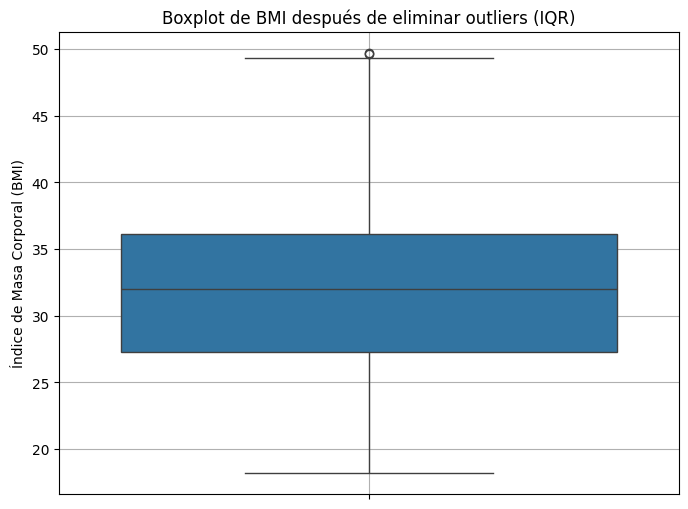

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot de BMI después de eliminar outliers (IQR)')
plt.ylabel('Índice de Masa Corporal (BMI)')
plt.grid(True)
plt.show()

outliers DiabetesPedigreeFunction

In [ ]:
dpf_stats = df['DiabetesPedigreeFunction'].describe()
dpf_stats

count    676.000000
mean       0.467902
std        0.315220
min        0.078000
25%        0.245000
50%        0.375500
75%        0.613250
max        2.288000
Name: DiabetesPedigreeFunction, dtype: float64

In [ ]:
Q1_dpf = df["DiabetesPedigreeFunction"].quantile(0.05)
Q3_dpf = df["DiabetesPedigreeFunction"].quantile(0.75)
IQR_dpf = Q3_dpf - Q1_dpf

limite_inferior_dpf = Q1_dpf - 1.5 * IQR_dpf
limite_superior_dpf = Q3_dpf + 1.5 * IQR_dpf


outliers_dpf = df[
    (df["DiabetesPedigreeFunction"] < limite_inferior_dpf) | (df["DiabetesPedigreeFunction"] > limite_superior_dpf)
]
print(f"\nNúmero de outliers en 'DiabetesPedigreeFunction' según el método IQR: {len(outliers_dpf)}")


df_sin_outliers_dpf_iqr = df[
    (df["DiabetesPedigreeFunction"] >= limite_inferior_dpf) & (df["DiabetesPedigreeFunction"] <= limite_superior_dpf)
]


print(f"Forma del DataFrame original (antes de eliminar outliers de DiabetesPedigreeFunction con IQR): {df.shape}")
print(
    f"Forma del DataFrame sin outliers en 'DiabetesPedigreeFunction' (método IQR): {df_sin_outliers_dpf_iqr.shape}"
)


df = df_sin_outliers_dpf_iqr.copy()

print(f"Forma del DataFrame 'df' después de eliminar outliers de 'DiabetesPedigreeFunction' (método IQR): {df.shape}")


dpf_stats_despues = df['DiabetesPedigreeFunction'].describe()
print("\nEstadísticas descriptivas de 'DiabetesPedigreeFunction' después de eliminar outliers:")
print(dpf_stats_despues)


Número de outliers en 'DiabetesPedigreeFunction' según el método IQR: 0
Forma del DataFrame original (antes de eliminar outliers de DiabetesPedigreeFunction con IQR): (647, 9)
Forma del DataFrame sin outliers en 'DiabetesPedigreeFunction' (método IQR): (647, 9)
Forma del DataFrame 'df' después de eliminar outliers de 'DiabetesPedigreeFunction' (método IQR): (647, 9)

Estadísticas descriptivas de 'DiabetesPedigreeFunction' después de eliminar outliers:
count    647.000000
mean       0.425700
std        0.243776
min        0.078000
25%        0.240000
50%        0.361000
75%        0.583000
max        1.162000
Name: DiabetesPedigreeFunction, dtype: float64


Creo que hay casos extremos 

Valores faltanes 

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Escalado, test y train

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()


cols_to_scale = X_train.columns.tolist() 


X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Primeras filas de X_train escalado:")
print(X_train_scaled.head())

print("\nPrimeras filas de X_test escalado:")
print(X_test_scaled.head())

Primeras filas de X_train escalado:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
253    -1.177771 -1.140713      -0.354598       0.764852 -0.819203  0.610578   
627    -1.177771  0.441489       0.534046      -1.369714 -0.819203  0.072299   
727    -1.177771  0.751050       1.067232       0.364621 -0.819203  0.072299   
260    -0.250030  2.470835      -0.354598      -0.369136  0.708040 -0.165177   
677    -1.177771 -0.899943      -1.065513      -1.369714 -0.819203  0.531420   

     DiabetesPedigreeFunction       Age  
253                 -0.760625 -0.684933  
627                 -0.109282 -1.034499  
727                  0.058807 -0.947107  
260                 -0.504290  0.101590  
677                 -0.655570 -0.684933  

Primeras filas de X_test escalado:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
128    -0.868524 -0.074446       1.422689       0.231210  0.884260  0.404766   
748    -0.250030  2.333252      -0.

modelo 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


criteria = ['gini', 'entropy', 'log_loss']
results = {}

for criterion in criteria:
   
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)

   
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    
    accuracy = accuracy_score(y_test, y_pred)

  
    results[criterion] = accuracy


print("Precisión del árbol de decisión para diferentes criterios:")
for criterion, accuracy in results.items():
    print(f"Criterio '{criterion}': Precisión = {accuracy:.4f}")

Precisión del árbol de decisión para diferentes criterios:
Criterio 'gini': Precisión = 0.7923
Criterio 'entropy': Precisión = 0.7308
Criterio 'log_loss': Precisión = 0.7308


gráfico de barras de la precisión por criterio

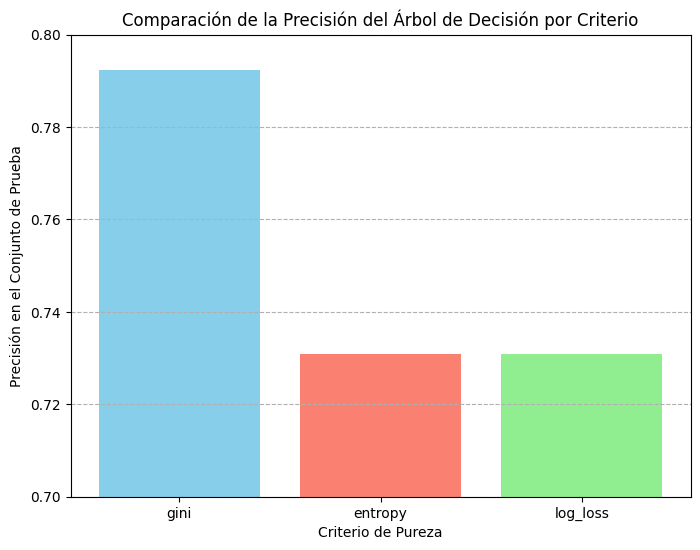

In [ ]:
import matplotlib.pyplot as plt


criteria = ['gini', 'entropy', 'log_loss']
accuracies = [0.7923, 0.7308, 0.7308] 


plt.figure(figsize=(8, 6))
plt.bar(criteria, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Criterio de Pureza')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.title('Comparación de la Precisión del Árbol de Decisión por Criterio')
plt.ylim(0.7, 0.8)  
plt.grid(axis='y', linestyle='--')
plt.show()

Gini tiene una mejor presición 

optimizacion 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_tree = grid_search.best_estimator_


y_pred_best = best_tree.predict(X_test_scaled)


accuracy_best = accuracy_score(y_test, y_pred_best)


print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print(f"Precisión del mejor modelo en el conjunto de prueba: {accuracy_best:.4f}")

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Precisión del mejor modelo en el conjunto de prueba: 0.7500


Gini sigue siendo la mejor opcion 

In [ ]:
import joblib


ruta_guardado_joblib = 'modelo_arbol_decision_optimizado.joblib'


joblib.dump(best_tree, ruta_guardado_joblib)

print(f"Modelo optimizado guardado con joblib en: {ruta_guardado_joblib}")


ruta_guardado_gini_joblib = 'modelo_arbol_decision_gini.joblib'
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train_scaled, y_train)
joblib.dump(gini_tree, ruta_guardado_gini_joblib)

print(f"Modelo con criterio 'gini' guardado con joblib en: {ruta_guardado_gini_joblib}")

Modelo optimizado guardado con joblib en: modelo_arbol_decision_optimizado.joblib
Modelo con criterio 'gini' guardado con joblib en: modelo_arbol_decision_gini.joblib


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


In [ ]:
import pandas as pd


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'


df = pd.read_csv(url)


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


División de datos y entrenamiento del modelo

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)


X = df.drop('Outcome', axis=1)  
y = df['Outcome']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, None],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo número de muestras en una hoja
}




modelo de Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para encontrar los mejores parámetros (validación cruzada con 5 particiones)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Mejores parámetros encontrados: {grid_search.best_params_}")


best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Random Forest Accuracy: {accuracy_best}')

Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.7597402597402597


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)


X = df.drop('Outcome', axis=1)  
y = df['Outcome']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],  # Reducido a la mitad en comparación con el original
    'max_depth': [5, 10],  # Profundidad más baja
    'min_samples_split': [2, 5],  # Menos opciones
    'min_samples_leaf': [1, 2]  # Menos opciones
}

#
rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Entrenar el modelo con los mejores parámetros encontrados
best_rf_model = grid_search.best_estimator_


y_pred_best = best_rf_model.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Random Forest Accuracy: {accuracy_best}')


Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Random Forest Accuracy: 0.7402597402597403


comparacion 

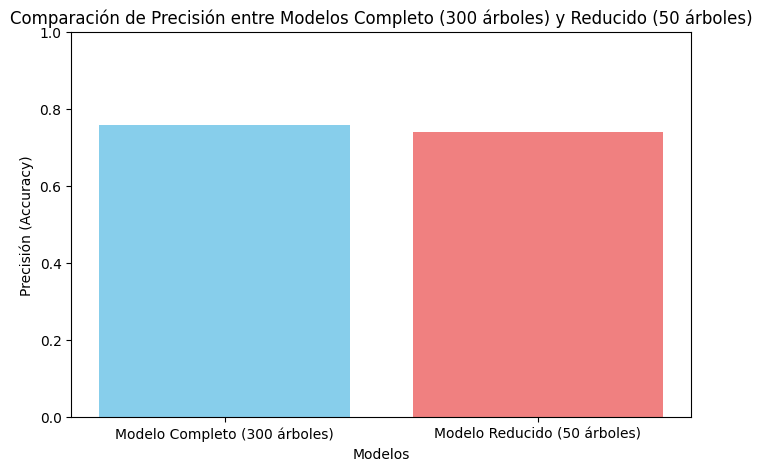

In [22]:

accuracy_best_full = 0.7597402597402597  # Precisión del modelo completo (300 árboles)
accuracy_best_reduced = 0.7402597402597403  # Precisión del modelo reducido (50 árboles)


models = ['Modelo Completo (300 árboles)', 'Modelo Reducido (50 árboles)']
accuracies = [accuracy_best_full, accuracy_best_reduced]


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.xlabel('Modelos')
plt.ylabel('Precisión (Accuracy)')
plt.title('Comparación de Precisión entre Modelos Completo (300 árboles) y Reducido (50 árboles)')
plt.ylim(0, 1)  
plt.show()


El modelo con los hiperparámetros reducidos es ligeramente menos preciso que el modelo con los hiperparámetros completos, como se puede ver en el gráfico

In [23]:
import joblib


modelo_guardado = 'random_forest_model.pkl'
joblib.dump(best_rf_model, modelo_guardado)
print(f"Modelo guardado en: {modelo_guardado}")


Modelo guardado en: random_forest_model.pkl


BOOSTING ALGORITHMS

In [ ]:
import pandas as pd


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)


X = df.drop('Outcome', axis=1)  
y = df['Outcome'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)


ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)


print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:09:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [6]:
print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)


AdaBoost
Accuracy Test:  0.7792207792207793
Accuracy Train:  0.7785016286644951
Gradient Boosting
Accuracy Test:  0.7402597402597403
Accuracy Train:  0.9381107491856677
XGBoost
Accuracy Test:  0.7337662337662337
Accuracy Train:  0.996742671009772
LightGBM
Accuracy Test:  0.7207792207792207
Accuracy Train:  1.0


Ajuste de Hiperparámetros

Training AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Training GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training XGBoost...


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [09:46:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [09:46:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [09:46:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [09:46:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/trainin

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training LightGBM...
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Info] Number of positive: 170, number of negative: 321

[LightGBM] [Info] Auto-choosing col-wi

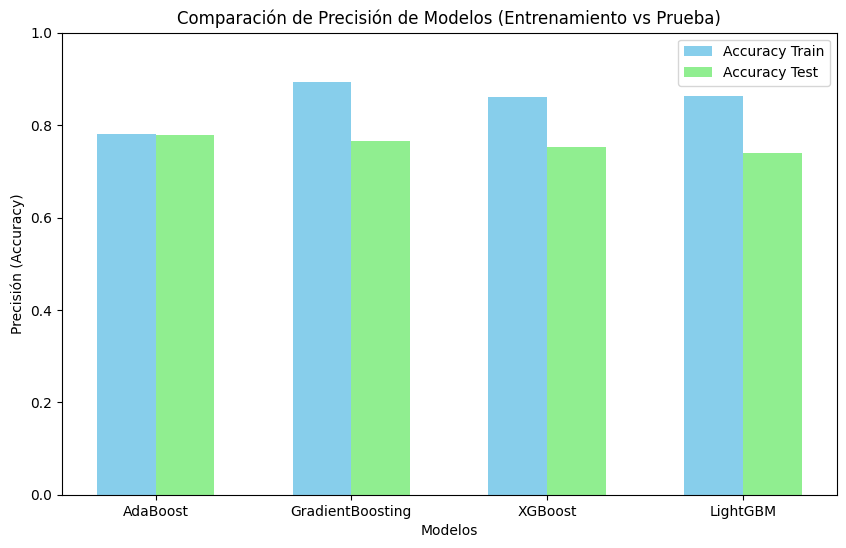

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

X = df.drop('Outcome', axis=1)  
y = df['Outcome']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}


models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}


best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")


predictions = {}
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(X_test)


accuracies_train = {}
accuracies_test = {}
for model_name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    accuracies_train[model_name] = accuracy_score(y_train, y_pred_train)
    accuracies_test[model_name] = accuracy_score(y_test, predictions[model_name])


for model_name in models.keys():
    print(f"{model_name} - Accuracy Train: {accuracies_train[model_name]}")
    print(f"{model_name} - Accuracy Test: {accuracies_test[model_name]}")


model_names = list(models.keys())
train_accuracies = list(accuracies_train.values())
test_accuracies = list(accuracies_test.values())

x = range(len(model_names))
width = 0.3  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x, train_accuracies, width=width, label='Accuracy Train', color='skyblue')

ax.bar([p + width for p in x], test_accuracies, width=width, label='Accuracy Test', color='lightgreen')

ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión (Accuracy)')
ax.set_title('Comparación de Precisión de Modelos (Entrenamiento vs Prueba)')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(model_names)
ax.legend()

plt.ylim(0, 1)
plt.show()


Comparación entre resultados sin ajustar y resultados con ajuste de hiperparámetros

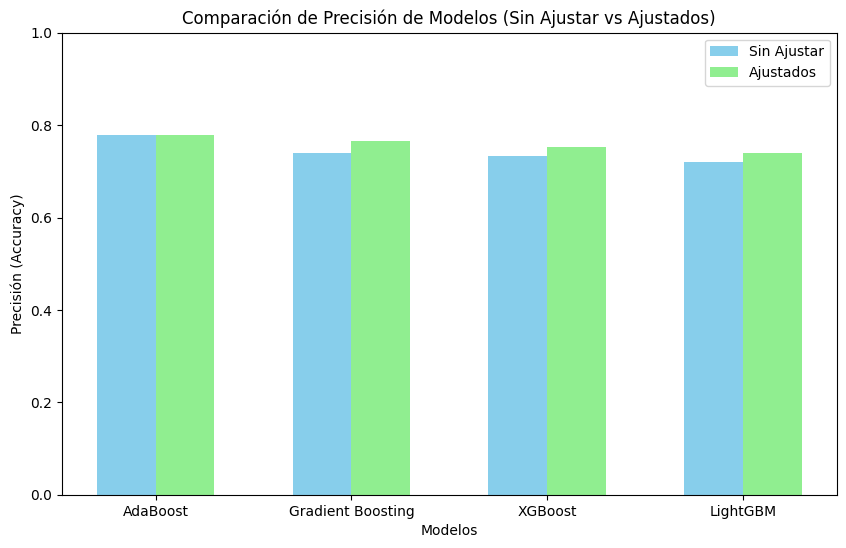

In [ ]:
import matplotlib.pyplot as plt


model_names = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM']

no_tuned_accuracies_test = [0.7792, 0.7403, 0.7338, 0.7208]


tuned_accuracies_test = [0.7792, 0.7662, 0.7532, 0.7403]


x = range(len(model_names))
width = 0.3  

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x, no_tuned_accuracies_test, width=width, label='Sin Ajustar', color='skyblue')

ax.bar([p + width for p in x], tuned_accuracies_test, width=width, label='Ajustados', color='lightgreen')

ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión (Accuracy)')
ax.set_title('Comparación de Precisión de Modelos (Sin Ajustar vs Ajustados)')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(model_names)
ax.legend()

plt.ylim(0, 1)
plt.show()


En los modelos Grandient Boosting, XgBoost y LightGMB se puede ver una leve mejora ajustando los hiperparámetros. Con AdaBoost no ocure lo mismo.
Los modelos Gradient Boosting, XGBoost y LightGBM están sufriendo de overfitting, tienen una diferencia entre la precisión de prueba y la de entrenamiento, lo que no ocurre con el modelo AdBoost 

In [ ]:
import joblib

best_model = best_models['AdaBoost']


joblib.dump(best_model, 'best_ada_boost_model.pkl')
print("Modelo guardado exitosamente")


Modelo guardado exitosamente


In [8]:

for model_name, model in best_models.items():
    filename = f'{model_name}_best_model.pkl'
    joblib.dump(model, filename)
    print(f"{model_name} guardado en {filename}")


AdaBoost guardado en AdaBoost_best_model.pkl
GradientBoosting guardado en GradientBoosting_best_model.pkl
XGBoost guardado en XGBoost_best_model.pkl
LightGBM guardado en LightGBM_best_model.pkl
